<a href="https://colab.research.google.com/github/Akshithkumarreddy/Machine_learning_AL/blob/main/association_sample_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df = pd.read_excel('perfumes.xlsx')
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Month of the year,Transaction ID,Product,Product Category (Enhanced Ecommerce),Product Brand,Product Revenue,Quantity
0,2022,1,466349,Benamôr - Benamôr - Creme de Rosto 50ml,Hidratantes,Benamôr,11.93,1
1,2022,1,466349,Lancôme - La Vie Est Belle - Eau de Parfum 1.2...,Amostras,Lancôme,0.00,1
2,2022,1,466349,Lancôme - La Vie Est Belle - Eau de Parfum 30ml,Perfumes,Lancôme,48.11,1
3,2022,1,466351,Benamôr - Benamôr - Creme Chantilly Hidratante...,Hidratantes,Benamôr,19.50,1
4,2022,1,466351,Benamôr - Benamôr - Sabonete original 100g,Banho,Benamôr,4.43,1


In [10]:
df.tail()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Month of the year,Transaction ID,Product,Product Category (Enhanced Ecommerce),Product Brand,Product Revenue,Quantity
72909,2022,10,531748,Dior - Miss Dior Blooming B - Eau de Toilette ...,Perfumes,Dior,96.75,1
72910,2022,10,531749,Anny - Anny - 168.50 - BIKINI BASH 15ml,Vernizes,Anny,7.92,1
72911,2022,10,531749,Anny - Anny - 305 - COOL ATTITUDE 15ml,Vernizes,Anny,7.92,1
72912,2022,10,531749,Anny - Anny - 314.30 - HOT CHOCOLATE WEATHER 15ml,Vernizes,Anny,7.92,1
72913,2022,10,531749,Anny - Hiking In La - 371.40 - SAVE THE GREEN ...,Vernizes,Anny,7.92,1


In [11]:
df.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(72914, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72914 entries, 0 to 72913
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   72914 non-null  int64  
 1   Month of the year                      72914 non-null  int64  
 2   Transaction ID                         72914 non-null  int64  
 3   Product                                72914 non-null  object 
 4   Product Category (Enhanced Ecommerce)  72914 non-null  object 
 5   Product Brand                          72914 non-null  object 
 6   Product Revenue                        72914 non-null  float64
 7   Quantity                               72914 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.5+ MB


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Month of the year,Transaction ID,Product Revenue,Quantity
count,72914.0,72914.000000,72914.000000,72914.000000,72914.000000
mean,2022.0,5.668459,498730.068670,50.784353,1.074924
std,0.0,2.921859,19084.564589,38.671615,0.355826
min,2022.0,1.000000,466349.000000,0.000000,1.000000
25%,2022.0,3.000000,481524.250000,24.600000,1.000000
50%,2022.0,6.000000,499010.500000,46.400000,1.000000
75%,2022.0,8.000000,515219.750000,69.490000,1.000000
max,2022.0,10.000000,531749.000000,1235.000000,12.000000


In [14]:
#counting unique values in dataframe
count = df.nunique()
count

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Year,1
Month of the year,10
Transaction ID,46875
Product,11360
Product Category (Enhanced Ecommerce),88
Product Brand,178
Product Revenue,6493
Quantity,9


In [16]:
df['Transaction ID'] = df['Transaction ID'].astype('str')
df['Transaction ID']

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction ID
0,466349
1,466349
2,466349
3,466351
4,466351
...,...
72909,531748
72910,531749
72911,531749
72912,531749


In [17]:
Basket = df.groupby(['Transaction ID', 'Product Category (Enhanced Ecommerce)'])['Quantity'].sum().reset_index().fillna(0).set_index('Transaction ID')
Basket

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product Category (Enhanced Ecommerce),Quantity
Transaction ID,,
466349,Amostras,1
466349,Hidratantes,1
466349,Perfumes,1
466351,Banho,1
466351,Hidratantes,1
...,...,...
531743,Perfumes,1
531745,Perfumes,1
531747,Perfumes,1


In [18]:
#number of rows decrease as unstack changed the shape of datafram
#zero indicates that no product was bought by this transaction id

Basket = df.groupby(['Transaction ID', 'Product Category (Enhanced Ecommerce)'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction ID')
Basket

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product Category (Enhanced Ecommerce),Acessórios de Moda,Acessórios manicure,After Sun Corpo,After Sun Rosto,Aftershave,Amostras,Anti-idade,Auto-bronzeadores Corpo,Auto-bronzeadores Rosto,Avolumadores,...,Soluções específicas,Sombras,Styling,Suplementos Cabelo & Unhas,Suplementos Pele,Séruns,Tez,Tratamentos,Tónicos,Vernizes
Transaction ID,,,,,,,,,,,,,,,,,,,,,
466349,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#converting to 1 and 0 as it is required by our algorithm
#0 will mean present in transaction
#1 will mean item was not bought
def convert(x):
  if x<= 0:
    return False
  if x>= 1:
    return True
basket = Basket.applymap(convert)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-22e05af6afe4>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = Basket.applymap(convert)


Metrics of Association Analysis

Support--> if we have item A in 10 transactions out of 100 support is 10/100

Confidence--> We consider two items .If item B come in 5 transactions out of 10 transactions in which Item A was present the confidence will be 5/10

Lift --> Confidence of A and B divided by Support of B

In [21]:
#applying apriori algorithm
#By default, apriori returns the column indices of the items, which may be useful in downstream operations
#such as association rule mining. For better readability, we can set use_colnames=True to convert these integer values into the respective item names:
#Lift basically tells us the likelihood of buying a the two items together
#min_support  parameter is used to select the items with support values greater than the value specified by the parameter.
#min_length parameter specifies the minimum number of items that you want in your rules.
itemset = apriori(basket, min_support=0.001,use_colnames = True)
frequent = association_rules(itemset, metric="lift", min_threshold=1,num_itemsets=len(df))
frequent

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(After Sun Corpo),(Protectores solares Corpo),0.003200,0.007189,0.001451,0.453333,63.056380,1.0,0.001428,1.816117,0.987301,0.162291,0.449375,0.327557
1,(Protectores solares Corpo),(After Sun Corpo),0.007189,0.003200,0.001451,0.201780,63.056380,1.0,0.001428,1.248779,0.991268,0.162291,0.199218,0.327557
2,(Amostras),(Séruns),0.009152,0.035200,0.001003,0.109557,3.112418,1.0,0.000681,1.083506,0.684975,0.023130,0.077070,0.069021
3,(Séruns),(Amostras),0.035200,0.009152,0.001003,0.028485,3.112418,1.0,0.000681,1.019900,0.703468,0.023130,0.019511,0.069021
4,(Coffrets Cosmética),(Anti-idade),0.031851,0.050347,0.001621,0.050904,1.011074,1.0,0.000018,1.000587,0.011313,0.020122,0.000587,0.041554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,"(Séruns, Hidratantes)",(Olhos & Lábios),0.006379,0.033216,0.001408,0.220736,6.645466,1.0,0.001196,1.240637,0.854975,0.036872,0.193962,0.131562
156,"(Olhos & Lábios, Séruns)",(Hidratantes),0.005440,0.061888,0.001408,0.258824,4.182128,1.0,0.001071,1.265707,0.765049,0.021359,0.209928,0.140787
157,(Hidratantes),"(Olhos & Lábios, Séruns)",0.061888,0.005440,0.001408,0.022751,4.182128,1.0,0.001071,1.017714,0.811084,0.021359,0.017405,0.140787
158,(Olhos & Lábios),"(Séruns, Hidratantes)",0.033216,0.006379,0.001408,0.042389,6.645466,1.0,0.001196,1.037605,0.878709,0.036872,0.036242,0.131562


In [22]:
frequent.sort_values(by=['lift'],ascending = False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(After Sun Corpo),(Protectores solares Corpo),0.003200,0.007189,0.001451,0.453333,63.056380,1.0,0.001428,1.816117,0.987301,0.162291,0.449375,0.327557
1,(Protectores solares Corpo),(After Sun Corpo),0.007189,0.003200,0.001451,0.201780,63.056380,1.0,0.001428,1.248779,0.991268,0.162291,0.199218,0.327557
62,(Condicionador),(Champô),0.003413,0.019371,0.002112,0.618750,31.942628,1.0,0.002046,2.572143,0.972012,0.102167,0.611219,0.363890
63,(Champô),(Condicionador),0.019371,0.003413,0.002112,0.109031,31.942628,1.0,0.002046,1.118542,0.987829,0.102167,0.105979,0.363890
145,(Protectores solares Corpo),(Protectores solares Rosto),0.007189,0.008704,0.001536,0.213650,24.546169,1.0,0.001473,1.260629,0.966207,0.106984,0.206745,0.195060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,(Limpeza Desmaquilhantes),(Bases Liquidas),0.028181,0.041216,0.001344,0.047691,1.157103,1.0,0.000182,1.006799,0.139710,0.019749,0.006753,0.040150
117,(Hidratantes),(Tratamentos),0.061888,0.015765,0.001024,0.016546,1.049519,1.0,0.000048,1.000794,0.050295,0.013363,0.000793,0.040749
116,(Tratamentos),(Hidratantes),0.015765,0.061888,0.001024,0.064953,1.049519,1.0,0.000048,1.003278,0.047938,0.013363,0.003267,0.040749
4,(Coffrets Cosmética),(Anti-idade),0.031851,0.050347,0.001621,0.050904,1.011074,1.0,0.000018,1.000587,0.011313,0.020122,0.000587,0.041554


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


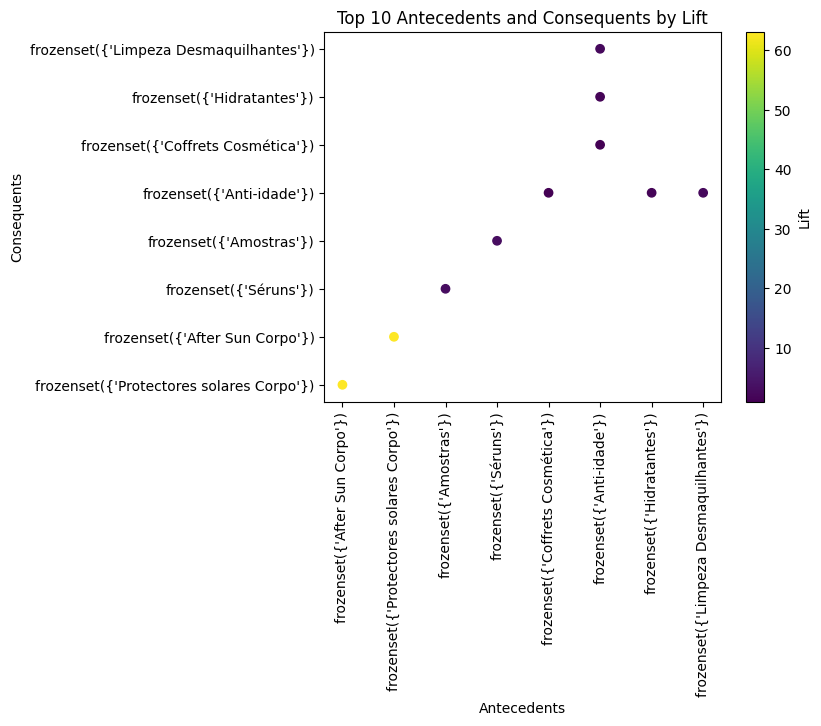

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dataset by lift in descending order
sorted_dataset = frequent.sort_values('lift', ascending=False)

# Select the top 10 antecedents, consequents, and lift values
top_10_antecedents = frequent['antecedents'].astype(str).head(10)
top_10_consequents = frequent['consequents'].astype(str).head(10)
top_10_lift = frequent['lift'].head(10)

# Create the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(top_10_antecedents, top_10_consequents, c=top_10_lift, cmap='viridis')
plt.xlabel('Antecedents')
plt.ylabel('Consequents')
plt.title('Top 10 Antecedents and Consequents by Lift')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add a colorbar-like legend
cbar = plt.colorbar(scatter)
cbar.set_label('Lift')

plt.show()